In [95]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import ParameterSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
import hdbscan
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib

In [2]:
# If necessary, adjust the file path relative to the current working directory
file_path = 'data/processed/final_dataset.csv'

# Import the CSV file as a DataFrame
df = pd.read_csv(file_path)

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_22260\2827758482.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
df['codigo_fabricante'] 

0         40007404.0
1         40000662.0
2         40000662.0
3         40000772.0
4         40000138.0
             ...    
697029    40000876.0
697030    40007533.0
697031    40007533.0
697032    40000346.0
697033    40000346.0
Name: codigo_fabricante, Length: 697034, dtype: float64

In [4]:
# vamos a ver cuantos fabricantes distintos hay
fabricantes_count = df['codigo_fabricante'].value_counts()
print(fabricantes_count)

codigo_fabricante
40007533.0     121047
40000086.0      58329
40000138.0      48521
40001145.0      48449
40000085.0      45411
                ...  
40000202.0          1
40000713.0          1
40000080.0          1
400007389.0         1
40007524.0          1
Name: count, Length: 305, dtype: int64


In [5]:
df['codigo_fabricante'].value_counts()

codigo_fabricante
40007533.0     121047
40000086.0      58329
40000138.0      48521
40001145.0      48449
40000085.0      45411
                ...  
40000202.0          1
40000713.0          1
40000080.0          1
400007389.0         1
40007524.0          1
Name: count, Length: 305, dtype: int64

In [6]:
fabricantes_percentage = df['codigo_fabricante'].value_counts(normalize=True) * 100
print(fabricantes_percentage)

codigo_fabricante
40007533.0     17.366011
40000086.0      8.368171
40000138.0      6.961066
40001145.0      6.950737
40000085.0      6.514890
                 ...    
40000202.0      0.000143
40000713.0      0.000143
40000080.0      0.000143
400007389.0     0.000143
40007524.0      0.000143
Name: proportion, Length: 305, dtype: float64


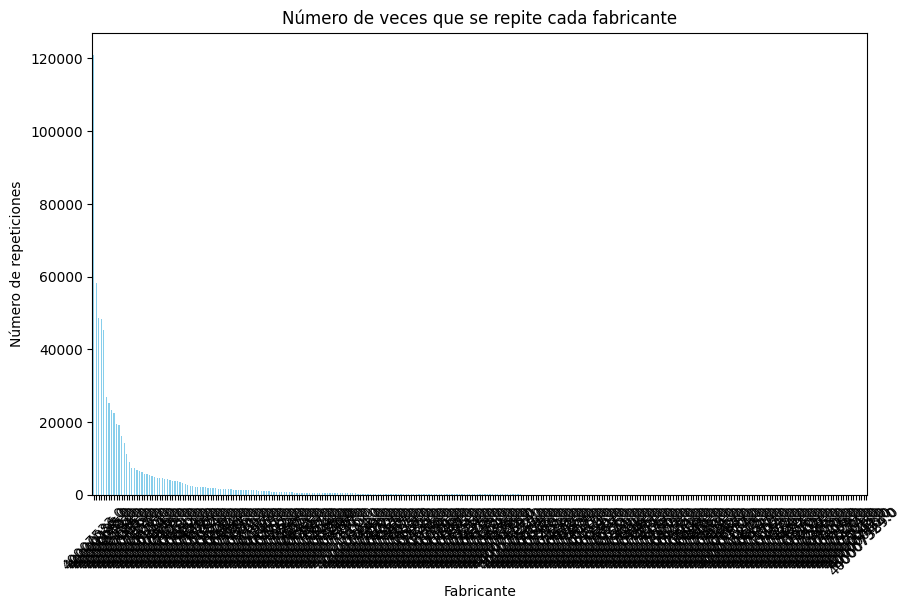

In [7]:

# Gráfico de barras
fabricantes_count.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Número de veces que se repite cada fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Número de repeticiones')
plt.xticks(rotation=45)
plt.show()

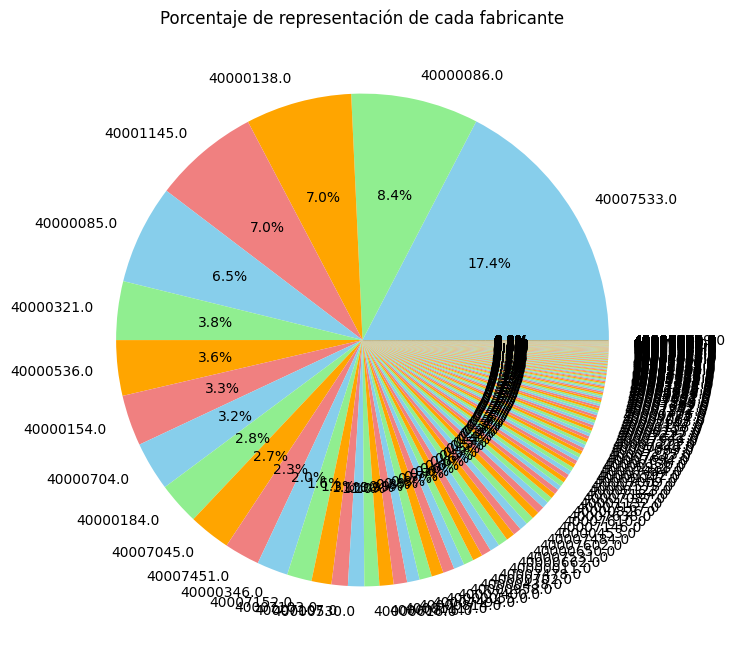

In [8]:
# Gráfico circular
fabricantes_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Porcentaje de representación de cada fabricante')
plt.ylabel('')  # Ocultar etiqueta del eje y
plt.show()

codigo_fabricante
40007533.0     121047
40000086.0      58329
40000138.0      48521
40001145.0      48449
40000085.0      45411
                ...  
40000202.0          1
40000713.0          1
40000080.0          1
400007389.0         1
40007524.0          1
Name: count, Length: 305, dtype: int64


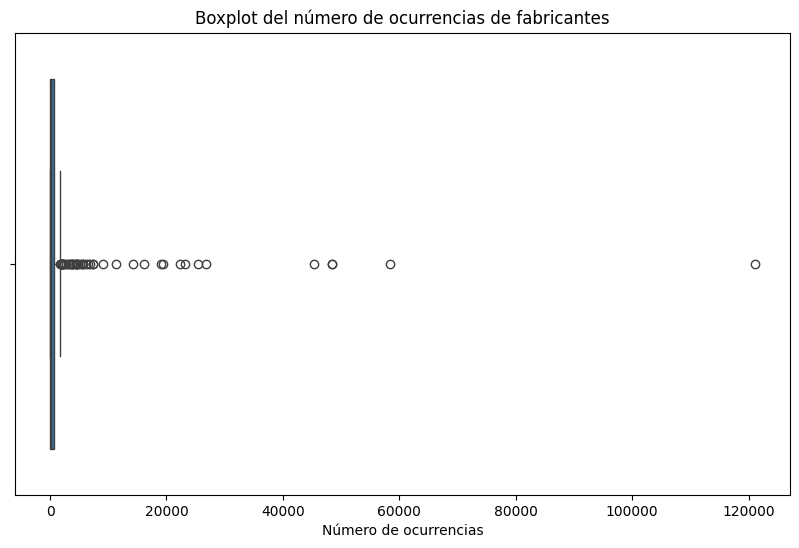

In [9]:
fabricantes_count = df['codigo_fabricante'].value_counts()

print(fabricantes_count)
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=fabricantes_count)
plt.title('Boxplot del número de ocurrencias de fabricantes')
plt.xlabel('Número de ocurrencias')
plt.show()

In [10]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df['codigo_fabricante'].value_counts().describe()

count      305
mean      2285
std       9547
min          1
25%          7
50%         74
75%        709
max     121047
Name: count, dtype: float64

In [11]:
df['codigo_fabricante'] = df['codigo_fabricante'].astype(float)

In [12]:
valor_buscado = 400007389  # Como vamos a convertir a float, usamos 40000160.0
conteo = (df['codigo_fabricante'] == valor_buscado).sum()
print(f'El valor {valor_buscado} se repite {conteo} veces.')

El valor 400007389 se repite 1 veces.


In [13]:
fabricante_counts = df['codigo_fabricante'].value_counts()

# Filtrar los códigos de fabricante que se repiten 100 o más veces
codigos_a_mantener = fabricante_counts[fabricante_counts >= 100].index

# Filtrar el DataFrame para conservar solo los códigos que se repiten 100 o más veces
df = df[df['codigo_fabricante'].isin(codigos_a_mantener)]

In [14]:
fabricantes_count = df['codigo_fabricante'].value_counts()
print(fabricantes_count)

codigo_fabricante
40007533    121047
40000086     58329
40000138     48521
40001145     48449
40000085     45411
             ...  
40000537       112
40007048       112
40007635       110
40007604       104
40007331       101
Name: count, Length: 143, dtype: int64


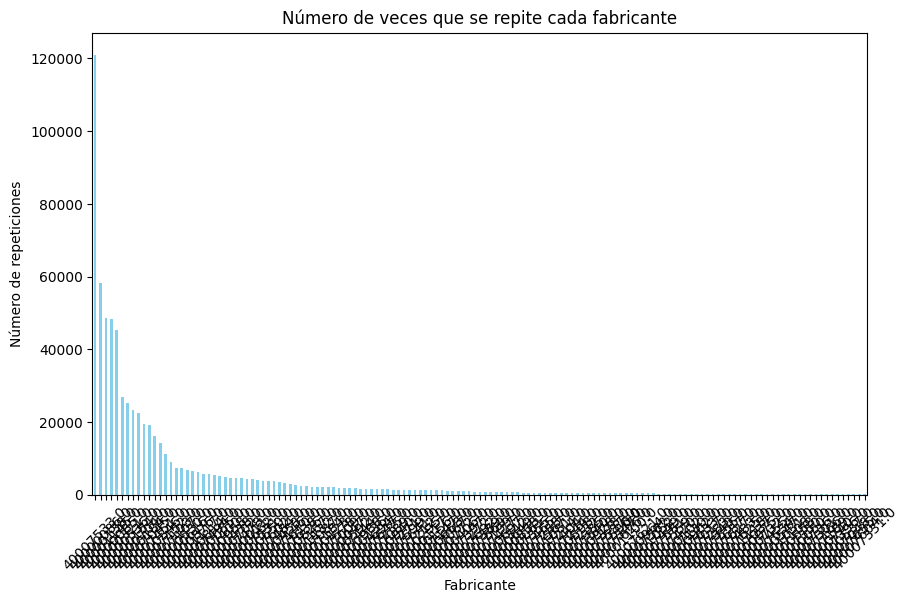

In [15]:
# Gráfico de barras
fabricantes_count.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Número de veces que se repite cada fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Número de repeticiones')
plt.xticks(rotation=45)
plt.show()

In [16]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df['codigo_fabricante'].value_counts().describe()

count      143
mean      4851
std      13515
min        101
25%        289
50%        858
75%       3126
max     121047
Name: count, dtype: float64

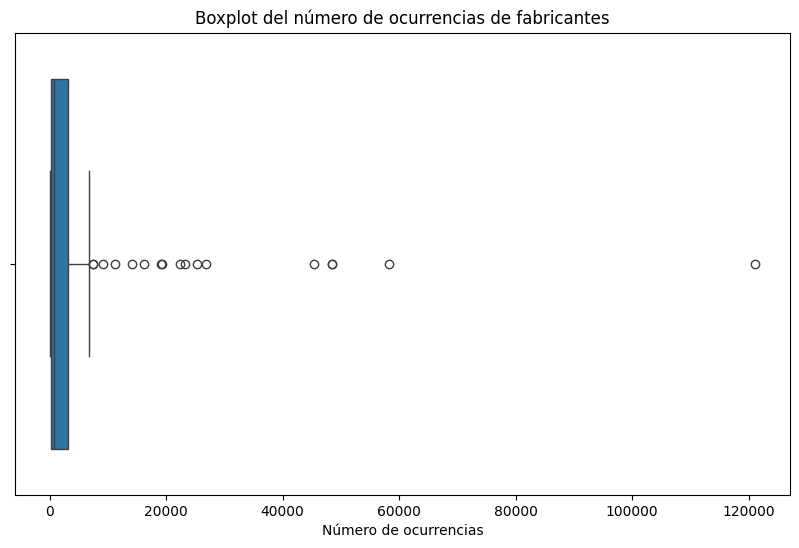

In [17]:
fabricantes_count = df['codigo_fabricante'].value_counts()

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=fabricantes_count)
plt.title('Boxplot del número de ocurrencias de fabricantes')
plt.xlabel('Número de ocurrencias')
plt.show()

In [18]:
df.shape

(693719, 16)

In [19]:
df.head()

,EJERCICIO,FECHA,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,VENTA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,poblacion,fecha_creacion,codigo_grupo,tiene_credito
0,2024,2024-02-29 00:00:00.000,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,28078,0028,40007404,46700,GANDIA,15/12/2004,1,1
1,2024,2024-07-31 00:00:00.000,1019,TUBO DE ENLACE KOMBIFIX CON TUERCAS REF. 152.4...,1,0044152426461,SM1-11147,29,28078,0044,40000662,46700,GANDIA,15/12/2004,1,1
2,2021,2021-01-29 00:00:00.000,1019,FLOTADOR UNIFILL REF. 240.705.00.1 PARA CISTER...,1,0044240705001,SM1-1785,21,6724,0044,40000662,46700,GANDIA,15/12/2004,1,1
3,2024,2024-04-30 00:00:00.000,1019,Plato de ducha de carga mineral textura pizarr...,1,0060PDSGPZ10070BL,SM1-6071,29,28078,0064,40000772,46700,GANDIA,15/12/2004,1,1
4,2023,2023-05-31 00:00:00.000,1019,VERTEDERO MODELO GARDA A371055000 ROCA,1,00R00601,SM1-8041,51,24814,00R006,40000138,46700,GANDIA,15/12/2004,1,1


In [20]:
# Simplificamos la columna codigo_familia a los dos primeros dígitos.
df['codigo_familia'] = df['codigo_familia'].astype(str)

# Obtén solo los dos primeros dígitos de cada valor en la columna
df['codigo_familia'] = df['codigo_familia'].str.slice(0, 2)

In [21]:
df.head()

,EJERCICIO,FECHA,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,VENTA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,poblacion,fecha_creacion,codigo_grupo,tiene_credito
0,2024,2024-02-29 00:00:00.000,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,28078,00,40007404,46700,GANDIA,15/12/2004,1,1
1,2024,2024-07-31 00:00:00.000,1019,TUBO DE ENLACE KOMBIFIX CON TUERCAS REF. 152.4...,1,0044152426461,SM1-11147,29,28078,00,40000662,46700,GANDIA,15/12/2004,1,1
2,2021,2021-01-29 00:00:00.000,1019,FLOTADOR UNIFILL REF. 240.705.00.1 PARA CISTER...,1,0044240705001,SM1-1785,21,6724,00,40000662,46700,GANDIA,15/12/2004,1,1
3,2024,2024-04-30 00:00:00.000,1019,Plato de ducha de carga mineral textura pizarr...,1,0060PDSGPZ10070BL,SM1-6071,29,28078,00,40000772,46700,GANDIA,15/12/2004,1,1
4,2023,2023-05-31 00:00:00.000,1019,VERTEDERO MODELO GARDA A371055000 ROCA,1,00R00601,SM1-8041,51,24814,00,40000138,46700,GANDIA,15/12/2004,1,1


In [22]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df['CLIENTE'].value_counts().describe()

count    4121
mean      168
std       851
min         1
25%         2
50%         8
75%        37
max     30583
Name: count, dtype: float64

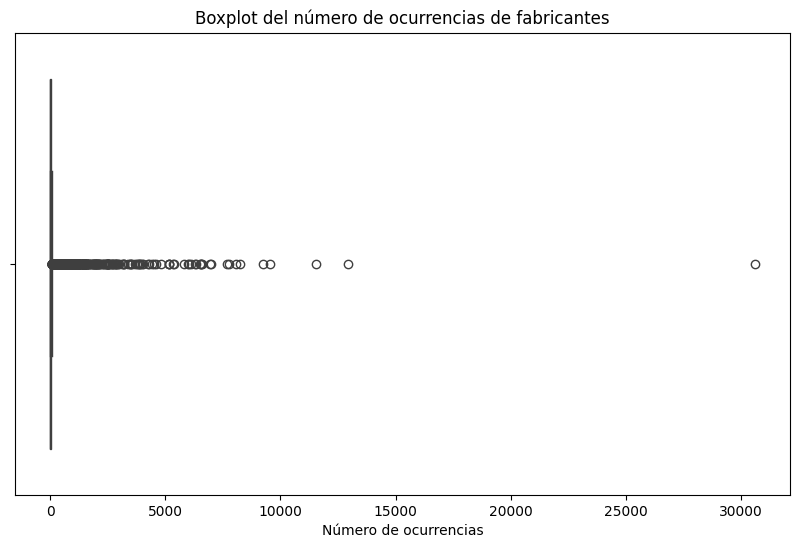

In [23]:
fabricantes_count = df['CLIENTE'].value_counts()

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=fabricantes_count)
plt.title('Boxplot del número de ocurrencias de fabricantes')
plt.xlabel('Número de ocurrencias')
plt.show()

In [24]:
# Crear una tabla pivote donde las columnas sean los años (EJERCICIO) y los valores sean las VENTA_ANUAL
ventas_anuales_por_cliente = df.pivot_table(index='CLIENTE', 
                                            columns='EJERCICIO', 
                                            values='VENTA_ANUAL', 
                                            aggfunc='first', 
                                            fill_value=0)

# Renombrar las columnas para que sea más claro que representan ventas anuales
ventas_anuales_por_cliente.columns = [f'VENTA_ANUAL_{col}' for col in ventas_anuales_por_cliente.columns]

# Mostrar el resultado
print(ventas_anuales_por_cliente)

         VENTA_ANUAL_2021  VENTA_ANUAL_2022  VENTA_ANUAL_2023  \
CLIENTE                                                         
1019                 6724              3887             24814   
1025                  123               207                12   
1032                    6                48                99   
1035                    0                 1               155   
1043                 1911                 0               333   
...                   ...               ...               ...   
98026                 161                16               172   
98027                 191              1489               217   
98156                   0                61                50   
98317               13370             20997             18453   
98406                 106                 2                 0   

         VENTA_ANUAL_2024  
CLIENTE                    
1019                28078  
1025                   65  
1032                    0  
1035          

In [25]:
df = df.merge(ventas_anuales_por_cliente, on='CLIENTE', how='left')

In [26]:
df = df.drop(columns="VENTA_ANUAL")

In [27]:
df.head()

,EJERCICIO,FECHA,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,poblacion,fecha_creacion,codigo_grupo,tiene_credito,VENTA_ANUAL_2021,VENTA_ANUAL_2022,VENTA_ANUAL_2023,VENTA_ANUAL_2024
0,2024,2024-02-29 00:00:00.000,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,00,40007404,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078
1,2024,2024-07-31 00:00:00.000,1019,TUBO DE ENLACE KOMBIFIX CON TUERCAS REF. 152.4...,1,0044152426461,SM1-11147,29,00,40000662,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078
2,2021,2021-01-29 00:00:00.000,1019,FLOTADOR UNIFILL REF. 240.705.00.1 PARA CISTER...,1,0044240705001,SM1-1785,21,00,40000662,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078
3,2024,2024-04-30 00:00:00.000,1019,Plato de ducha de carga mineral textura pizarr...,1,0060PDSGPZ10070BL,SM1-6071,29,00,40000772,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078
4,2023,2023-05-31 00:00:00.000,1019,VERTEDERO MODELO GARDA A371055000 ROCA,1,00R00601,SM1-8041,51,00,40000138,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078


In [28]:
df['antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(df['fecha_creacion'])).dt.days

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_22260\3559426856.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(df['fecha_creacion'])).dt.days


In [29]:
df.head()

,EJERCICIO,FECHA,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,poblacion,fecha_creacion,codigo_grupo,tiene_credito,VENTA_ANUAL_2021,VENTA_ANUAL_2022,VENTA_ANUAL_2023,VENTA_ANUAL_2024,antiguedad
0,2024,2024-02-29 00:00:00.000,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,00,40007404,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078,7234
1,2024,2024-07-31 00:00:00.000,1019,TUBO DE ENLACE KOMBIFIX CON TUERCAS REF. 152.4...,1,0044152426461,SM1-11147,29,00,40000662,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078,7234
2,2021,2021-01-29 00:00:00.000,1019,FLOTADOR UNIFILL REF. 240.705.00.1 PARA CISTER...,1,0044240705001,SM1-1785,21,00,40000662,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078,7234
3,2024,2024-04-30 00:00:00.000,1019,Plato de ducha de carga mineral textura pizarr...,1,0060PDSGPZ10070BL,SM1-6071,29,00,40000772,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078,7234
4,2023,2023-05-31 00:00:00.000,1019,VERTEDERO MODELO GARDA A371055000 ROCA,1,00R00601,SM1-8041,51,00,40000138,46700,GANDIA,15/12/2004,1,1,6724,3887,24814,28078,7234


In [30]:
# Conteo de clientes por codigo_grupo
clientes_por_grupo = df.groupby('codigo_familia')['CLIENTE'].nunique().reset_index()
clientes_por_grupo.columns = ['codigo_familia', 'num_clientes']
print(clientes_por_grupo)

   codigo_familia  num_clientes
0              00          1652
1              01          1808
2              02          1812
3              03           368
4              04           752
5              05          1141
6              06          2632
7              07           808
8              08          1835
9              09          1393
10             10           427
11             11            24
12             12           470
13             14           139
14             15            29
15             16          1352
16             17          1149
17             18           755
18             20          1145
19             27            15
20             28            93
21             32           108


<Axes: title={'center': 'Distribución de codigo_familia'}, xlabel='codigo_familia'>

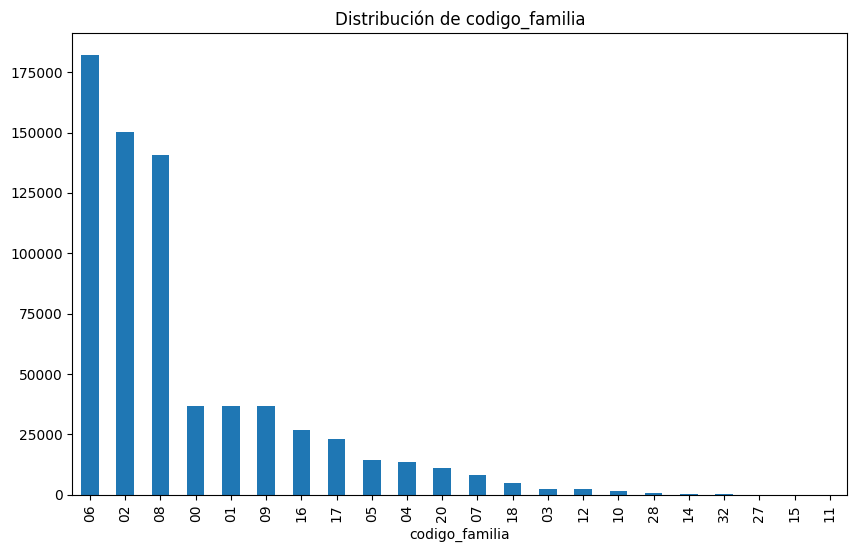

In [31]:
df['codigo_familia'].value_counts().plot(kind='bar', figsize=(10,6), title='Distribución de codigo_familia')


In [32]:
df = df.drop(columns="fecha_creacion")

In [33]:
df = df.drop(columns="poblacion")

In [34]:
df= df.drop(columns="FECHA")

In [35]:
df.head()

,EJERCICIO,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,codigo_grupo,tiene_credito,VENTA_ANUAL_2021,VENTA_ANUAL_2022,VENTA_ANUAL_2023,VENTA_ANUAL_2024,antiguedad
0,2024,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,00,40007404,46700,1,1,6724,3887,24814,28078,7234
1,2024,1019,TUBO DE ENLACE KOMBIFIX CON TUERCAS REF. 152.4...,1,0044152426461,SM1-11147,29,00,40000662,46700,1,1,6724,3887,24814,28078,7234
2,2021,1019,FLOTADOR UNIFILL REF. 240.705.00.1 PARA CISTER...,1,0044240705001,SM1-1785,21,00,40000662,46700,1,1,6724,3887,24814,28078,7234
3,2024,1019,Plato de ducha de carga mineral textura pizarr...,1,0060PDSGPZ10070BL,SM1-6071,29,00,40000772,46700,1,1,6724,3887,24814,28078,7234
4,2023,1019,VERTEDERO MODELO GARDA A371055000 ROCA,1,00R00601,SM1-8041,51,00,40000138,46700,1,1,6724,3887,24814,28078,7234


In [36]:
# Calcular la media de FRECUENCIA_ANUAL por CLIENTE
frecuencia_anual_media = df.groupby('CLIENTE')['FRECUENCIA_ANUAL'].mean().reset_index()
frecuencia_anual_media = frecuencia_anual_media.rename(columns={'FRECUENCIA_ANUAL': 'FRECUENCIA_ANUAL_MEDIA'})

# Añadir la columna FRECUENCIA_ANUAL_MEDIA al DataFrame original
df = df.merge(frecuencia_anual_media, on='CLIENTE', how='left')

# Redondear FRECUENCIA_ANUAL_MEDIA a 2 decimales
df['FRECUENCIA_ANUAL_MEDIA'] = df['FRECUENCIA_ANUAL_MEDIA'].round(2)

In [37]:
df.head()

,EJERCICIO,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,codigo_grupo,tiene_credito,VENTA_ANUAL_2021,VENTA_ANUAL_2022,VENTA_ANUAL_2023,VENTA_ANUAL_2024,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,2024,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,00,40007404,46700,1,1,6724,3887,24814,28078,7234,38
1,2024,1019,TUBO DE ENLACE KOMBIFIX CON TUERCAS REF. 152.4...,1,0044152426461,SM1-11147,29,00,40000662,46700,1,1,6724,3887,24814,28078,7234,38
2,2021,1019,FLOTADOR UNIFILL REF. 240.705.00.1 PARA CISTER...,1,0044240705001,SM1-1785,21,00,40000662,46700,1,1,6724,3887,24814,28078,7234,38
3,2024,1019,Plato de ducha de carga mineral textura pizarr...,1,0060PDSGPZ10070BL,SM1-6071,29,00,40000772,46700,1,1,6724,3887,24814,28078,7234,38
4,2023,1019,VERTEDERO MODELO GARDA A371055000 ROCA,1,00R00601,SM1-8041,51,00,40000138,46700,1,1,6724,3887,24814,28078,7234,38


In [38]:
df['FRECUENCIA_ANUAL_MEDIA'].describe()

count   693719
mean       268
std        267
min          1
25%         71
50%        182
75%        376
max       1101
Name: FRECUENCIA_ANUAL_MEDIA, dtype: float64

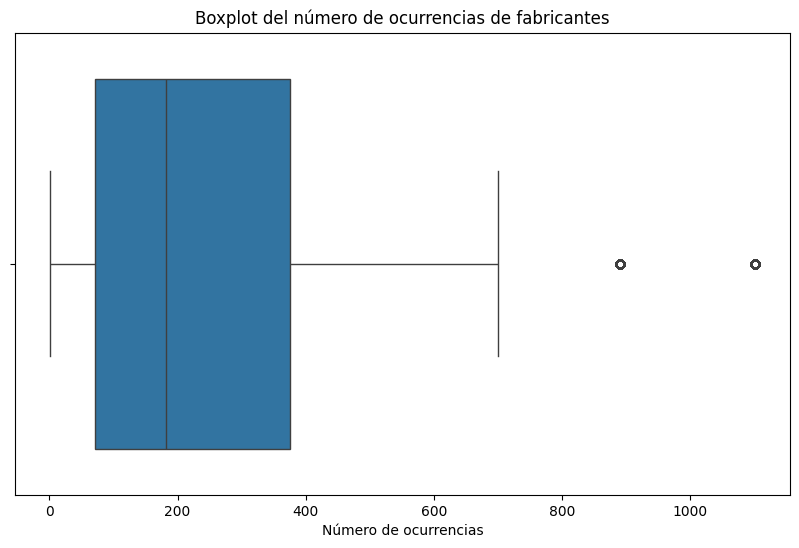

In [39]:
fabricantes_count = df['FRECUENCIA_ANUAL_MEDIA']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=fabricantes_count)
plt.title('Boxplot del número de ocurrencias de fabricantes')
plt.xlabel('Número de ocurrencias')
plt.show()

In [40]:
df['VENTA_ANUAL_2024'].describe()

count   693719
mean     40883
std      84037
min       -330
25%       3635
50%      14833
75%      37776
max     404138
Name: VENTA_ANUAL_2024, dtype: float64

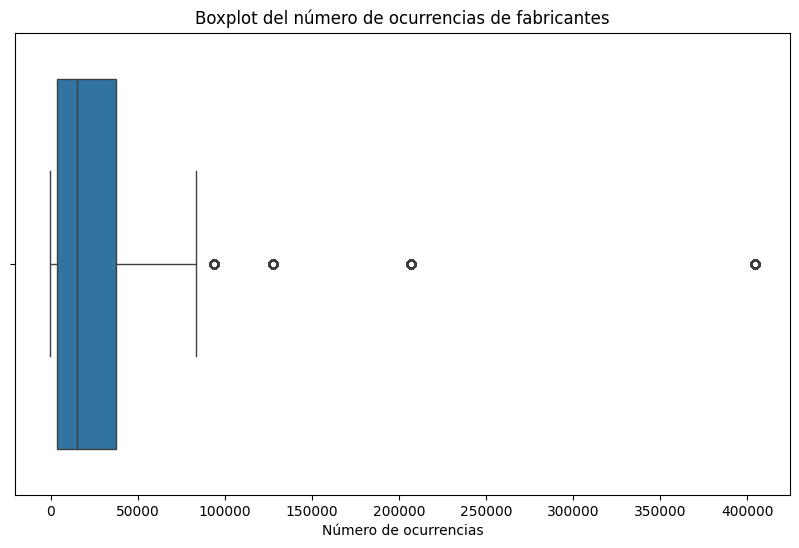

In [41]:
fabricantes_count = df['VENTA_ANUAL_2024']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=fabricantes_count)
plt.title('Boxplot del número de ocurrencias de fabricantes')
plt.xlabel('Número de ocurrencias')
plt.show()

In [42]:
df.head(1)

,EJERCICIO,CLIENTE,DESCRIPCION,UNIDADES,ARTICULO,CODIGO_COMPRA,FRECUENCIA_ANUAL,codigo_familia,codigo_fabricante,codigo_postal,codigo_grupo,tiene_credito,VENTA_ANUAL_2021,VENTA_ANUAL_2022,VENTA_ANUAL_2023,VENTA_ANUAL_2024,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,2024,1019,GRIFO LLENAVASOS PARA FUENTES DE AGUA REF. 100...,1,002810071,SM1-3128,29,00,40007404,46700,1,1,6724,3887,24814,28078,7234,38


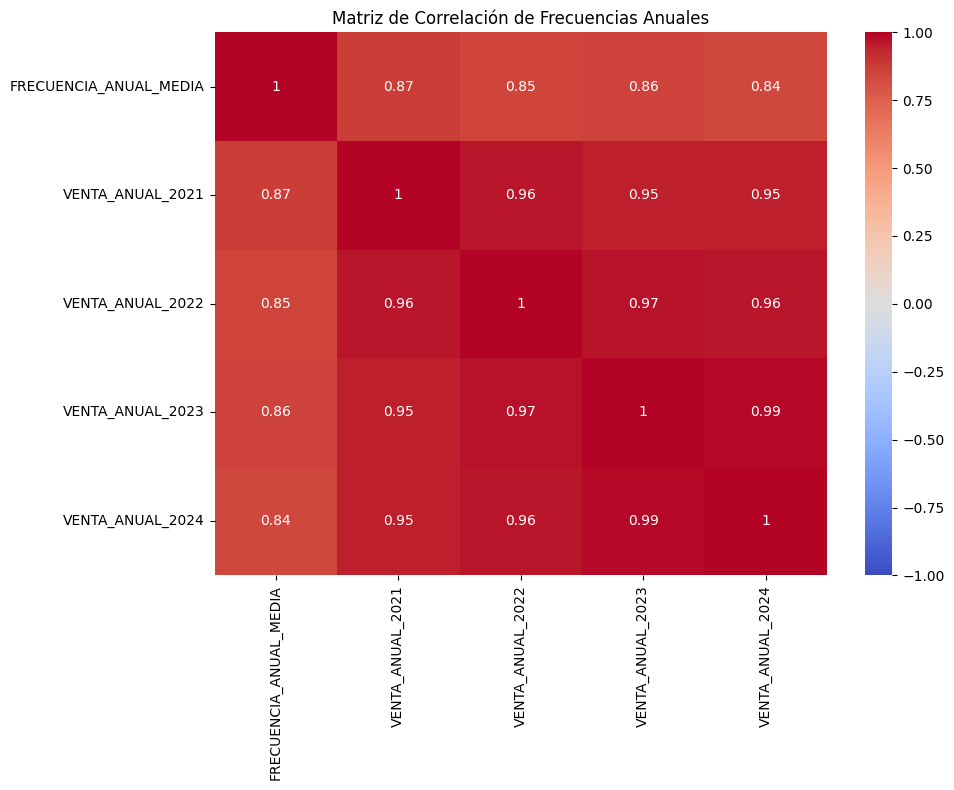

                        FRECUENCIA_ANUAL_MEDIA  VENTA_ANUAL_2021  \
FRECUENCIA_ANUAL_MEDIA                       1                 1   
VENTA_ANUAL_2021                             1                 1   
VENTA_ANUAL_2022                             1                 1   
VENTA_ANUAL_2023                             1                 1   
VENTA_ANUAL_2024                             1                 1   

                        VENTA_ANUAL_2022  VENTA_ANUAL_2023  VENTA_ANUAL_2024  
FRECUENCIA_ANUAL_MEDIA                 1                 1                 1  
VENTA_ANUAL_2021                       1                 1                 1  
VENTA_ANUAL_2022                       1                 1                 1  
VENTA_ANUAL_2023                       1                 1                 1  
VENTA_ANUAL_2024                       1                 1                 1  


In [43]:
# Seleccionar las columnas para la matriz de correlación
columnas_correlacion = ['FRECUENCIA_ANUAL_MEDIA', 'VENTA_ANUAL_2021', 'VENTA_ANUAL_2022', 'VENTA_ANUAL_2023','VENTA_ANUAL_2024']

# Crear la matriz de correlación
matriz_correlacion = df[columnas_correlacion].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Frecuencias Anuales')
plt.tight_layout()
plt.show()

# Mostrar la matriz de correlación
print(matriz_correlacion)

Vamos a quitar las instancias de todos los fabricantes que se hayan repetido menos de 100 veces en estos 4 años.

In [44]:
df_compras_unicas = df.drop_duplicates(subset=['CLIENTE', 'CODIGO_COMPRA'])

# Contar cuántas compras únicas ha realizado cada cliente
compras_por_cliente = df_compras_unicas['CLIENTE'].value_counts()

# Mostrar el resultado
print(compras_por_cliente)

CLIENTE
79576    3761
80471    3128
79001    2347
79280    2300
78991    1922
         ... 
81089       1
81194       1
81182       1
81154       1
86245       1
Name: count, Length: 4121, dtype: int64


In [45]:
df = df.drop(columns=["EJERCICIO","FRECUENCIA_ANUAL","VENTA_ANUAL_2021","VENTA_ANUAL_2022","VENTA_ANUAL_2023","VENTA_ANUAL_2024","DESCRIPCION"])

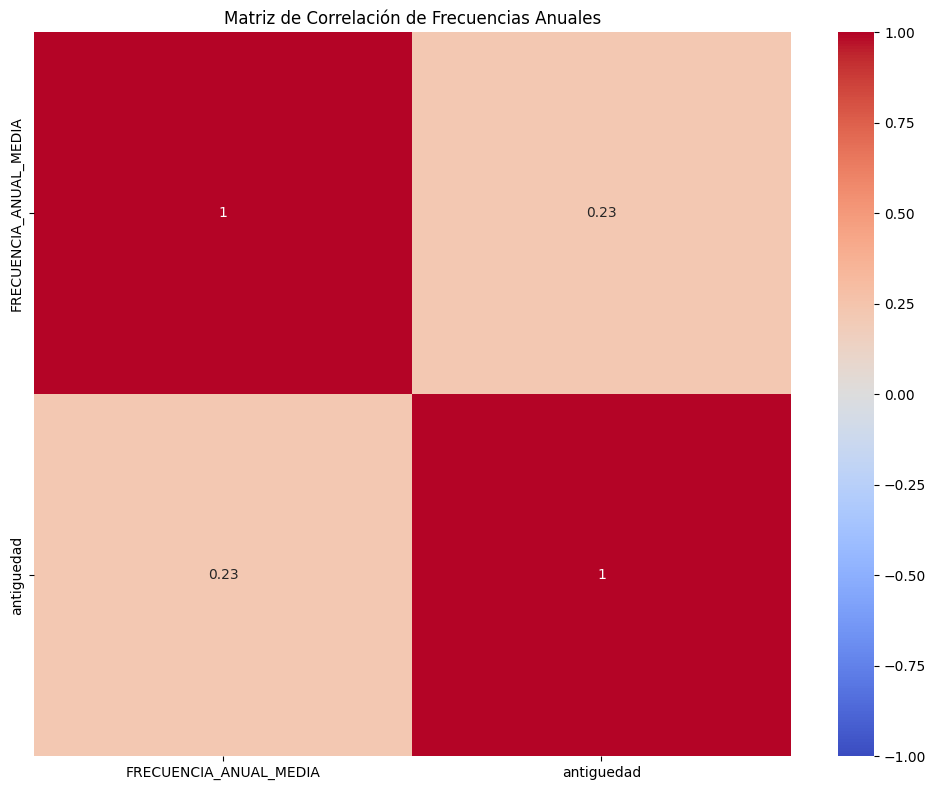

                        FRECUENCIA_ANUAL_MEDIA  antiguedad
FRECUENCIA_ANUAL_MEDIA                       1           0
antiguedad                                   0           1


In [46]:
# Seleccionar las columnas para la matriz de correlación
columnas_correlacion = ['FRECUENCIA_ANUAL_MEDIA', 'antiguedad']

# Crear la matriz de correlación
matriz_correlacion = df[columnas_correlacion].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Frecuencias Anuales')
plt.tight_layout()
plt.show()

# Mostrar la matriz de correlación
print(matriz_correlacion)

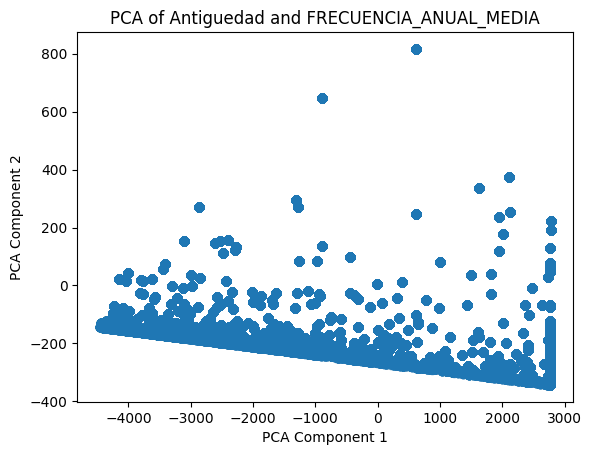

In [47]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['antiguedad', 'FRECUENCIA_ANUAL_MEDIA']])

plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('PCA of Antiguedad and FRECUENCIA_ANUAL_MEDIA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [48]:
df.head()

,CLIENTE,UNIDADES,ARTICULO,CODIGO_COMPRA,codigo_familia,codigo_fabricante,codigo_postal,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1019,1,002810071,SM1-3128,00,40007404,46700,1,1,7234,38
1,1019,1,0044152426461,SM1-11147,00,40000662,46700,1,1,7234,38
2,1019,1,0044240705001,SM1-1785,00,40000662,46700,1,1,7234,38
3,1019,1,0060PDSGPZ10070BL,SM1-6071,00,40000772,46700,1,1,7234,38
4,1019,1,00R00601,SM1-8041,00,40000138,46700,1,1,7234,38


In [49]:
df.shape

(693719, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693719 entries, 0 to 693718
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CLIENTE                 693719 non-null  int64  
 1   UNIDADES                693719 non-null  float64
 2   ARTICULO                693719 non-null  object 
 3   CODIGO_COMPRA           693719 non-null  object 
 4   codigo_familia          693719 non-null  object 
 5   codigo_fabricante       693719 non-null  float64
 6   codigo_postal           693719 non-null  object 
 7   codigo_grupo            693719 non-null  float64
 8   tiene_credito           693719 non-null  float64
 9   antiguedad              693719 non-null  int64  
 10  FRECUENCIA_ANUAL_MEDIA  693719 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 58.2+ MB


In [51]:
df.describe()

,CLIENTE,UNIDADES,codigo_fabricante,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
count,693719,693719,693719,693719,693719,693719,693719
mean,67784,7,39983370,4,1,4468,268
std,29080,28,887996,13,0,2208,267
min,1019,0,0,1,0,14,1
25%,78832,1,40000154,1,1,2558,71
50%,79653,2,40000814,1,1,4632,182
75%,81496,5,40007451,1,1,6581,376
max,98406,5100,40007694,99,1,7234,1101


In [52]:
# Número total de clientes únicos
total_clientes = df['CLIENTE'].nunique()

# Contar clientes por fabricante
clientes_por_fabricante = df.groupby('codigo_fabricante')['CLIENTE'].nunique().reset_index()

# Calcular porcentaje de clientes por fabricante
clientes_por_fabricante['porcentaje_clientes'] = (clientes_por_fabricante['CLIENTE'] / total_clientes) * 100

In [53]:
print(clientes_por_fabricante)

     codigo_fabricante  CLIENTE  porcentaje_clientes
0                    0       92                    2
1             40000011      432                   10
2             40000047      393                   10
3             40000050       83                    2
4             40000055      632                   15
..                 ...      ...                  ...
138           40007641      334                    8
139           40007647      381                    9
140           40007687       63                    2
141           40007692      231                    6
142           40007694      370                    9

[143 rows x 3 columns]


In [54]:
fabricantes_comunes = clientes_por_fabricante[clientes_por_fabricante['porcentaje_clientes'] > 0.0000001]
print(fabricantes_comunes)

     codigo_fabricante  CLIENTE  porcentaje_clientes
0                    0       92                    2
1             40000011      432                   10
2             40000047      393                   10
3             40000050       83                    2
4             40000055      632                   15
..                 ...      ...                  ...
138           40007641      334                    8
139           40007647      381                    9
140           40007687       63                    2
141           40007692      231                    6
142           40007694      370                    9

[143 rows x 3 columns]


In [55]:
df.head(1)

,CLIENTE,UNIDADES,ARTICULO,CODIGO_COMPRA,codigo_familia,codigo_fabricante,codigo_postal,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1019,1,002810071,SM1-3128,00,40007404,46700,1,1,7234,38


In [56]:
# Pivot para obtener las unidades por familia para cada cliente y añadir la columna 'total_articulos'
df_familia = df.pivot_table(
    index='CLIENTE',
    columns='codigo_familia',
    values='UNIDADES',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Añadir la columna 'total_articulos', que será la suma de todas las columnas de unidades
df_familia['total_articulos'] = df_familia.iloc[:, 1:].sum(axis=1)

In [57]:
df_familia.head()

codigo_familia,CLIENTE,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,20,27,28,32,total_articulos
0,1019,224,314,2745,15,7,8,2141,1,1146,...,0,0,268,1114,28,36,0,0,0,8432
1,1025,1,0,4,0,0,0,7,4,0,...,0,0,2,0,0,0,0,0,0,21
2,1032,0,1,0,0,0,0,4,0,4,...,0,0,0,0,0,0,0,0,0,10
3,1035,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,63
4,1043,10,1,40,0,13,0,139,0,7,...,0,0,18,168,2,0,0,0,0,433


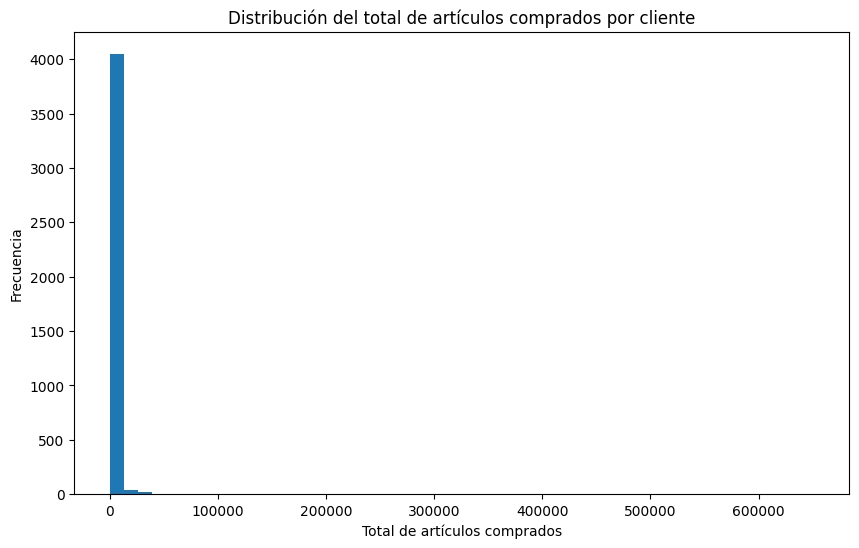

In [58]:
plt.figure(figsize=(10,6))
df_familia['total_articulos'].plot(kind='hist', bins=50, title='Distribución del total de artículos comprados por cliente')
plt.xlabel('Total de artículos comprados')
plt.ylabel('Frecuencia')
plt.show()

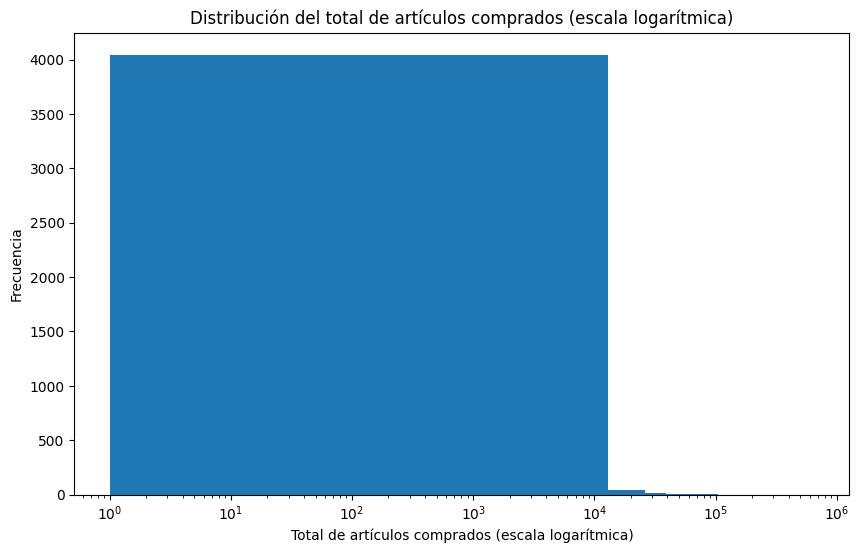

In [59]:
# Visualizar la distribución con una escala logarítmica en el eje x
plt.figure(figsize=(10,6))
df_familia['total_articulos'].plot(kind='hist', bins=50, logx=True, title='Distribución del total de artículos comprados (escala logarítmica)')
plt.xlabel('Total de artículos comprados (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.show()

In [60]:
# Descripción básica de los datos
print("Estadísticas descriptivas del total de artículos comprados por cliente:\n")
print(df_familia['total_articulos'].describe())

# Percentiles de los datos
print("\nPercentiles (25%, 50%, 75%, 90%, 95%, 99%):\n")
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
print(df_familia['total_articulos'].quantile(percentiles))

# Frecuencia acumulada para diferentes umbrales
umbrales = [1000, 5000, 10000, 20000, 50000]
frecuencia_acumulada = {}
porcentaje_acumulado = {}

total_clientes = len(df_familia)

Estadísticas descriptivas del total de artículos comprados por cliente:

count     4121
mean      1181
std      11940
min          1
25%          3
50%         15
75%        122
max     651447
Name: total_articulos, dtype: float64

Percentiles (25%, 50%, 75%, 90%, 95%, 99%):

0       3
0      15
1     122
1     992
1    4111
1   22666
Name: total_articulos, dtype: float64


In [61]:
print("\nFrecuencia y porcentaje acumulado de clientes que compran más de un cierto número de artículos:\n")
for umbral in umbrales:
    num_clientes = df_familia[df_familia['total_articulos'] >= umbral].shape[0]
    frecuencia_acumulada[umbral] = num_clientes
    porcentaje_acumulado[umbral] = (num_clientes / total_clientes) * 100
    print(f"Clientes con más de {umbral} artículos: {num_clientes} ({porcentaje_acumulado[umbral]:.2f}%)")

# Mostrar los resultados en un DataFrame para mayor claridad
df_resultados = pd.DataFrame({
    'Umbral de artículos': umbrales,
    'Clientes (>= umbral)': [frecuencia_acumulada[umbral] for umbral in umbrales],
    'Porcentaje (%)': [porcentaje_acumulado[umbral] for umbral in umbrales]
})

print("\nResumen de clientes por umbrales:\n")
print(df_resultados)


Frecuencia y porcentaje acumulado de clientes que compran más de un cierto número de artículos:

Clientes con más de 1000 artículos: 411 (9.97%)
Clientes con más de 5000 artículos: 180 (4.37%)
Clientes con más de 10000 artículos: 93 (2.26%)
Clientes con más de 20000 artículos: 47 (1.14%)
Clientes con más de 50000 artículos: 12 (0.29%)

Resumen de clientes por umbrales:

   Umbral de artículos  Clientes (>= umbral)  Porcentaje (%)
0                 1000                   411              10
1                 5000                   180               4
2                10000                    93               2
3                20000                    47               1
4                50000                    12               0


In [62]:
# Definir el umbral para separar clientes VIP
umbral_vip = 5000

# Separar los clientes VIP y normales
df_familia_vip = df_familia[df_familia['total_articulos'] >= umbral_vip]
df_familia_normales = df_familia[df_familia['total_articulos'] < umbral_vip]

# Verificar el tamaño de cada grupo
print(f"Número de clientes VIP: {df_familia_vip.shape[0]}")
print(f"Número de clientes normales: {df_familia_normales.shape[0]}")

# Opcional: Ver los primeros clientes de cada grupo
print("\nClientes VIP:")
print(df_familia_vip.head())

print("\nClientes normales:")
print(df_familia_normales.head())

Número de clientes VIP: 180
Número de clientes normales: 3941

Clientes VIP:
codigo_familia  CLIENTE  00  01   02  03  04  05   06  07   08  ...  14  15  \
0                  1019 224 314 2745  15   7   8 2141   1 1146  ...   0   0   
9                  1128  98 143 2175   4  21  49 1368  18  683  ...   0   2   
12                 1161 177 301 1917   2  30 155 1643  26  631  ...   0   0   
15                 1193  75  44 1525   5  22  32 1154   0 1577  ...   0   0   
22                 1233 103  79 2291   2 186  17  957   0  775  ...   9   0   

codigo_familia  16   17  18  20  27  28  32  total_articulos  
0              268 1114  28  36   0   0   0             8432  
9              161  953   6  47   0   0   0             5950  
12             155  564  17  52   0   0   1             5982  
15             130 1363  31  31   0   0   0             6269  
22              72  666   5  15   0   0   0             5329  

[5 rows x 24 columns]

Clientes normales:
codigo_familia  CLIENTE  00

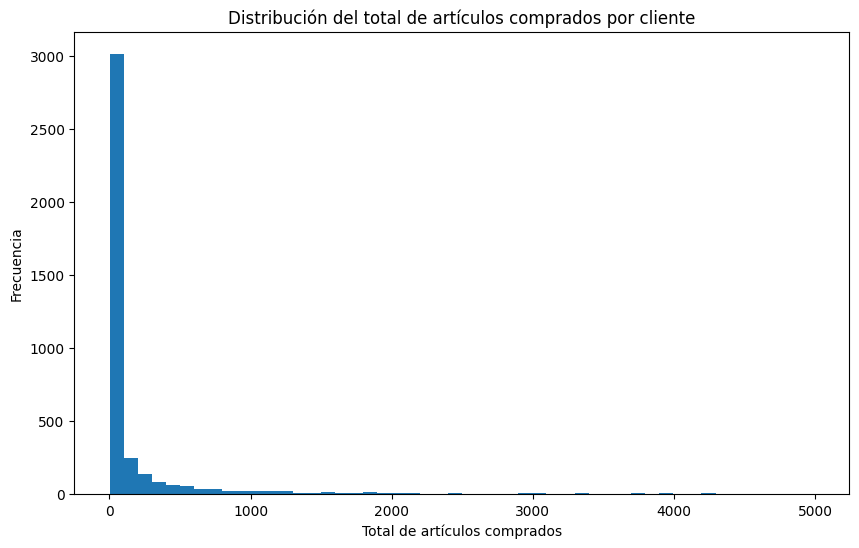

In [63]:
plt.figure(figsize=(10,6))
df_familia_normales['total_articulos'].plot(kind='hist', bins=50, title='Distribución del total de artículos comprados por cliente')
plt.xlabel('Total de artículos comprados')
plt.ylabel('Frecuencia')
plt.show()

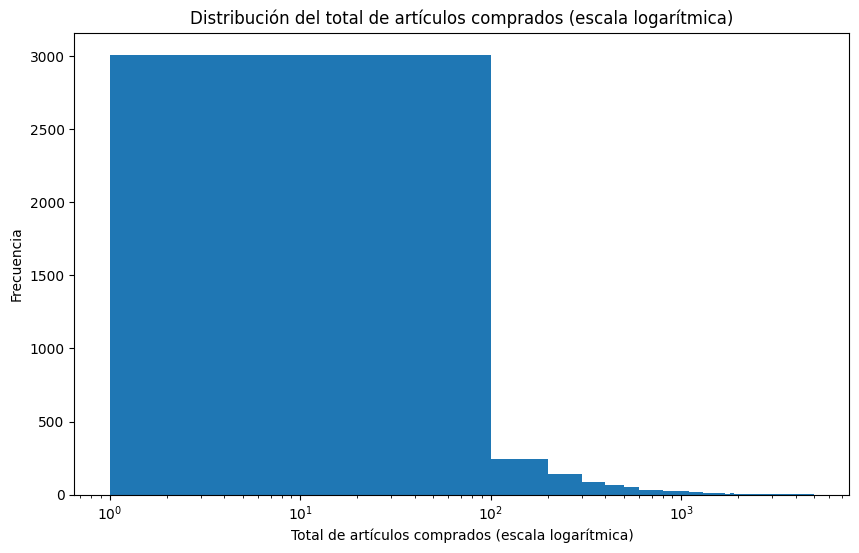

In [64]:
# Visualizar la distribución con una escala logarítmica en el eje x
plt.figure(figsize=(10,6))
df_familia_normales['total_articulos'].plot(kind='hist', bins=50, logx=True, title='Distribución del total de artículos comprados (escala logarítmica)')
plt.xlabel('Total de artículos comprados (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.show()

In [65]:
df_familia_normales.head()

codigo_familia,CLIENTE,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,20,27,28,32,total_articulos
1,1025,1,0,4,0,0,0,7,4,0,...,0,0,2,0,0,0,0,0,0,21
2,1032,0,1,0,0,0,0,4,0,4,...,0,0,0,0,0,0,0,0,0,10
3,1035,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,63
4,1043,10,1,40,0,13,0,139,0,7,...,0,0,18,168,2,0,0,0,0,433
5,1049,6,4,0,0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,15


In [66]:
# Separar clientes VIP y normales usando el umbral de 5000 artículos
umbral_vip = 5000
clientes_vip = df_familia[df_familia['total_articulos'] >= umbral_vip]['CLIENTE']
clientes_normales = df_familia[df_familia['total_articulos'] < umbral_vip]['CLIENTE']

# Pivot para obtener las unidades por fabricante para los clientes normales
df_fabricante_normales = df[df['CLIENTE'].isin(clientes_normales)].pivot_table(
    index='CLIENTE',
    columns='codigo_fabricante',
    values='UNIDADES',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Pivot para obtener las unidades por fabricante para los clientes VIP
df_fabricante_vip = df[df['CLIENTE'].isin(clientes_vip)].pivot_table(
    index='CLIENTE',
    columns='codigo_fabricante',
    values='UNIDADES',
    aggfunc='sum',
    fill_value=0
).reset_index()

In [67]:
df_fabricante_normales.head()

codigo_fabricante,CLIENTE,0,40000011,40000047,40000050,40000055,40000061,40000085,40000086,40000102,...,40007626,40007627,40007633,40007635,40007638,40007641,40007647,40007687,40007692,40007694
0,1025,0,0,1,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,1032,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1035,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1043,0,2,0,0,0,0,8,8,0,...,0,0,0,0,0,0,0,0,0,0
4,1049,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [68]:
df_fabricante_vip.head()

codigo_fabricante,CLIENTE,0,40000011,40000047,40000050,40000055,40000061,40000085,40000086,40000102,...,40007626,40007627,40007633,40007635,40007638,40007641,40007647,40007687,40007692,40007694
0,1019,0,0,30,0,21,0,274,1141,2,...,0,1,0,0,25,29,0,0,22,1
1,1128,0,15,6,0,31,0,209,409,1,...,0,0,0,2,4,4,7,0,1,6
2,1161,0,5,19,0,106,1,338,313,0,...,1,0,1,0,6,2,20,0,2,9
3,1193,1,4,0,0,42,2,175,514,0,...,2,0,0,0,24,3,3,0,6,0
4,1233,0,57,3,0,35,2,168,393,0,...,0,0,0,0,4,8,2,0,1,0


In [69]:
# Unir ambas tablas
df_pivot_normales = df_familia_normales.merge(df_fabricante_normales, on='CLIENTE', how='outer')

df_pivot_vip = df_familia_vip.merge(df_fabricante_vip, on='CLIENTE', how='outer')

In [70]:
df_pivot_final_normales = df_pivot_normales.merge(
    df[['CLIENTE', 'codigo_grupo', 'tiene_credito', 'antiguedad', 'FRECUENCIA_ANUAL_MEDIA']].drop_duplicates(),
    on='CLIENTE',
    how='left'
)

In [71]:
df_pivot_final_vip = df_pivot_vip.merge(
    df[['CLIENTE', 'codigo_grupo', 'tiene_credito', 'antiguedad', 'FRECUENCIA_ANUAL_MEDIA']].drop_duplicates(),
    on='CLIENTE',
    how='left'
)

In [72]:
df_pivot_final_normales.head()

,CLIENTE,00,01,02,03,04,05,06,07,08,...,40007638,40007641,40007647,40007687,40007692,40007694,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1025,1,0,4,0,0,0,7,4,0,...,0,0,0,0,0,0,9,0,7234,3
1,1032,0,1,0,0,0,0,4,0,4,...,0,0,0,0,0,0,1,1,7234,1
2,1035,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,1,0,6700,3
3,1043,10,1,40,0,13,0,139,0,7,...,0,0,0,0,0,0,1,1,7234,6
4,1049,6,4,0,0,0,0,3,1,0,...,0,0,0,0,0,4,7,0,3845,1


In [73]:
df_pivot_final_normales.shape

(3941, 171)

In [74]:
df_pivot_final_vip.head()

,CLIENTE,00,01,02,03,04,05,06,07,08,...,40007638,40007641,40007647,40007687,40007692,40007694,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1019,224,314,2745,15,7,8,2141,1,1146,...,25,29,0,0,22,1,1,1,7234,38
1,1128,98,143,2175,4,21,49,1368,18,683,...,4,4,7,0,1,6,1,0,7234,154
2,1161,177,301,1917,2,30,155,1643,26,631,...,6,2,20,0,2,9,1,1,7234,223
3,1193,75,44,1525,5,22,32,1154,0,1577,...,24,3,3,0,6,0,1,1,7234,100
4,1233,103,79,2291,2,186,17,957,0,775,...,4,8,2,0,1,0,1,1,7234,122


In [75]:
df_pivot_final_vip.shape

(180, 171)

In [76]:
# Función para escalar correctamente sin dejar intactos los ceros (excepto las columnas excluidas)
def robust_scale_all_values(df, columns_to_exclude):
    scaler = RobustScaler()

    # Asegurar que los nombres de las columnas sean strings
    df.columns = df.columns.astype(str)

    # Crear una copia del DataFrame
    df_scaled = df.copy()

    # Seleccionar las columnas numéricas que deben ser escaladas (excluyendo CLIENTE, tiene_credito, y codigo_grupo)
    columns_to_scale = df.drop(columns_to_exclude, axis=1).columns

    # Aplicar RobustScaler a todas las columnas numéricas seleccionadas
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    return df_scaled

# Definir las columnas que queremos excluir del escalado
columns_to_exclude = ['CLIENTE', 'tiene_credito', 'codigo_grupo']

# Aplicar el escalado a los DataFrames separados (clientes normales y VIP)
df_pivot_final_normales_scaled = robust_scale_all_values(df_pivot_final_normales, columns_to_exclude)
df_pivot_final_vip_scaled = robust_scale_all_values(df_pivot_final_vip, columns_to_exclude)

In [77]:
df_pivot_final_normales_scaled.head()


,CLIENTE,00,01,02,03,04,05,06,07,08,...,40007638.0,40007641.0,40007647.0,40007687.0,40007692.0,40007694.0,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1025,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,9,0,3,0
1,1032,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3,-0
2,1035,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,0
3,1043,5,0,4,0,13,0,11,0,1,...,0,0,0,0,0,0,1,1,3,1
4,1049,3,2,0,0,0,0,0,1,0,...,0,0,0,0,0,4,7,0,1,-0


In [78]:
df_pivot_final_vip_scaled.head()

,CLIENTE,00,01,02,03,04,05,06,07,08,...,40007638.0,40007641.0,40007647.0,40007687.0,40007692.0,40007694.0,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1019,0,0,-0,1,-0,-1,0,-0,-0,...,1,5,-0,0,5,-0,1,1,1,-1
1,1128,-0,-0,-0,0,-0,-0,-0,0,-0,...,-0,0,1,0,0,1,1,0,1,-0
2,1161,0,0,-0,-0,-0,1,-0,0,-0,...,0,0,2,0,0,1,1,1,1,0
3,1193,-0,-1,-0,0,-0,-0,-0,-0,0,...,1,0,0,0,1,-0,1,1,1,-0
4,1233,-0,-0,-0,-0,-0,-0,-0,-0,-0,...,-0,1,0,0,0,-0,1,1,1,-0


In [ ]:
df_pivot_final_vip_scaled.iloc[0,3]

In [79]:
# Función ajustada para aplicar HDBSCAN con parámetros más flexibles
def apply_hdbscan_clustering(df_scaled, min_cluster_size=5, min_samples=5):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
    df_scaled['Cluster'] = clusterer.fit_predict(df_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1))
    return df_scaled, clusterer

In [80]:
df_pivot_final_vip_clustered, clusterer_vip = apply_hdbscan_clustering(df_pivot_final_vip_scaled)

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_22260\3651865093.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled['Cluster'] = clusterer.fit_predict(df_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1))


In [81]:
df_pivot_final_normales_clustered, clusterer_normales = apply_hdbscan_clustering(df_pivot_final_normales_scaled)

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_22260\3651865093.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_scaled['Cluster'] = clusterer.fit_predict(df_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1))


In [82]:
def visualize_clusters(df, title):
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo', 'Cluster'], axis=1))
    
    # Crear un DataFrame con los resultados de PCA y los clusters
    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = df['Cluster']
    
    # Visualizar usando seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', legend='full')
    plt.title(title)
    plt.show()

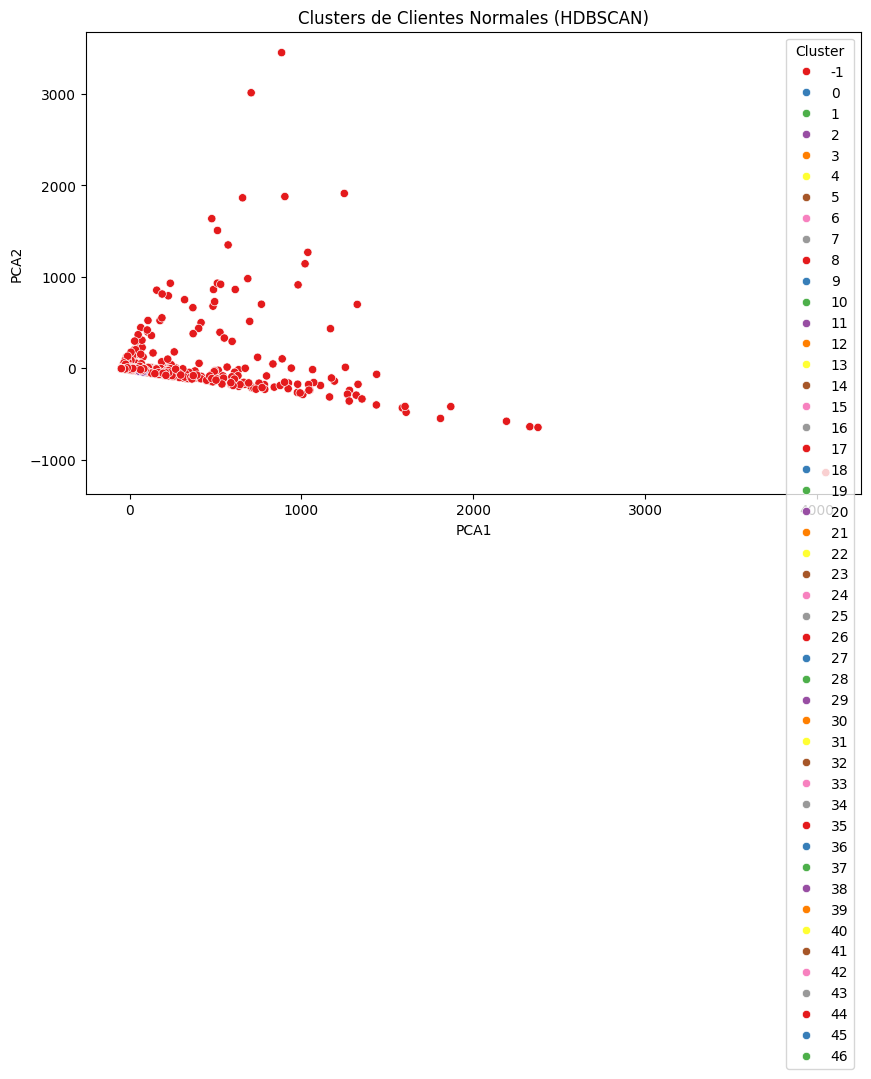

In [83]:
visualize_clusters(df_pivot_final_normales_clustered, "Clusters de Clientes Normales (HDBSCAN)")

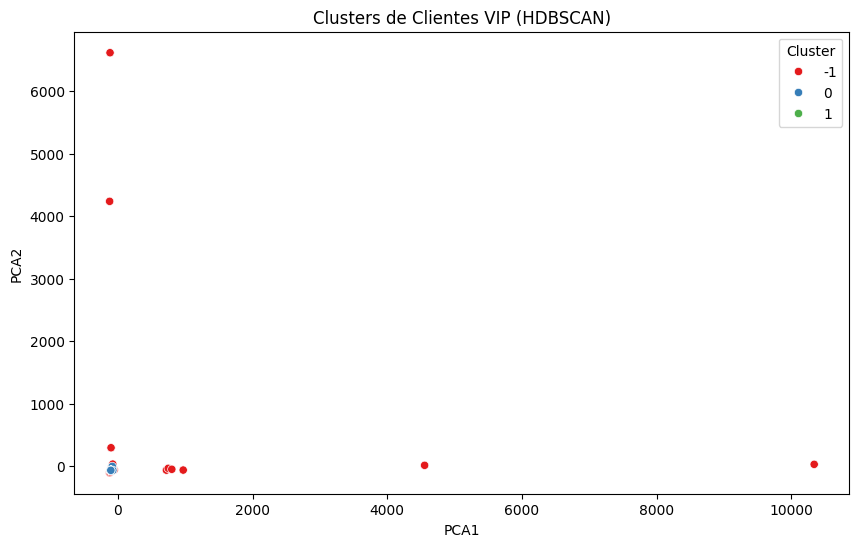

In [84]:
visualize_clusters(df_pivot_final_vip_clustered, "Clusters de Clientes VIP (HDBSCAN)")

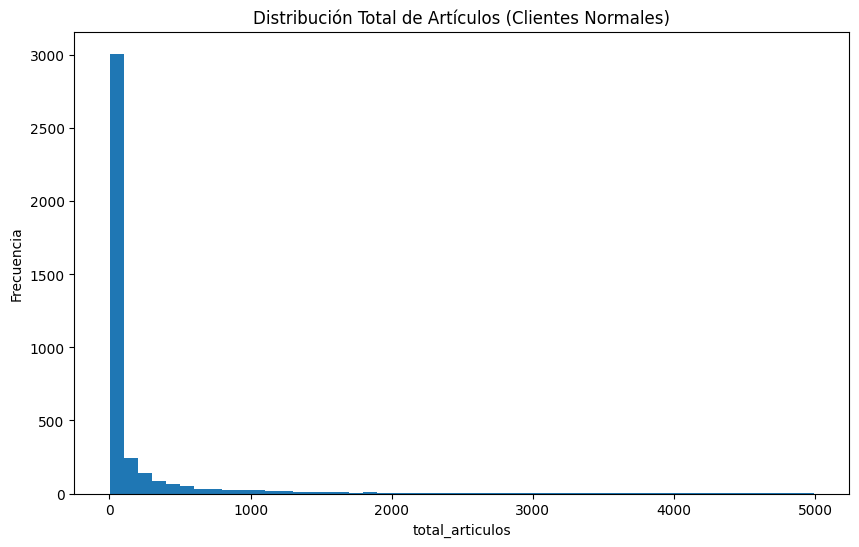

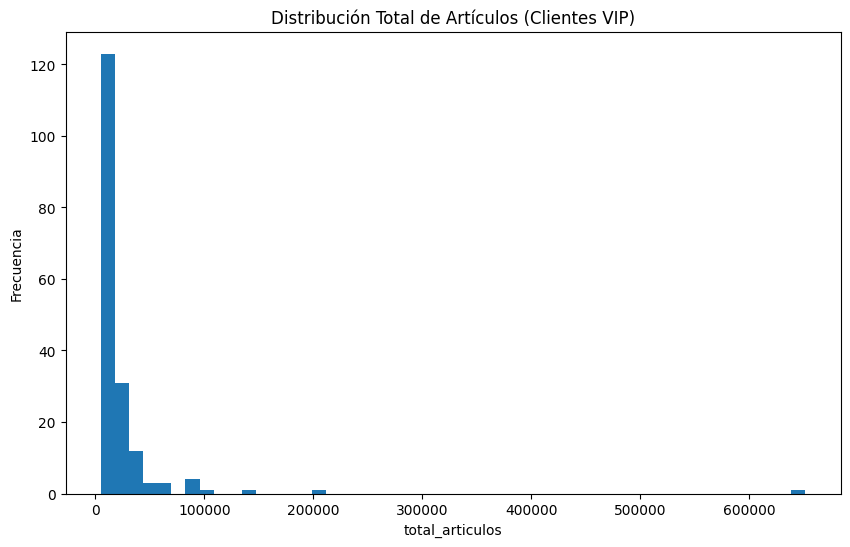

In [85]:
# Ver la distribución de los datos
def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    df[column].plot(kind='hist', bins=50, title=title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Ver la distribución del total de artículos comprados en ambos grupos
plot_distribution(df_pivot_final_normales, 'total_articulos', 'Distribución Total de Artículos (Clientes Normales)')
plot_distribution(df_pivot_final_vip, 'total_articulos', 'Distribución Total de Artículos (Clientes VIP)')

In [86]:
# Aplicar K-Means con 3 clusters (puedes ajustar el número según sea necesario)
def apply_kmeans(df_scaled, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_scaled['Cluster'] = kmeans.fit_predict(df_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1))
    return df_scaled


In [87]:
# Aplicar K-Means a los clientes normales y VIP
df_pivot_final_normales_kmeans = apply_kmeans(df_pivot_final_normales_scaled)
df_pivot_final_vip_kmeans = apply_kmeans(df_pivot_final_vip_scaled)


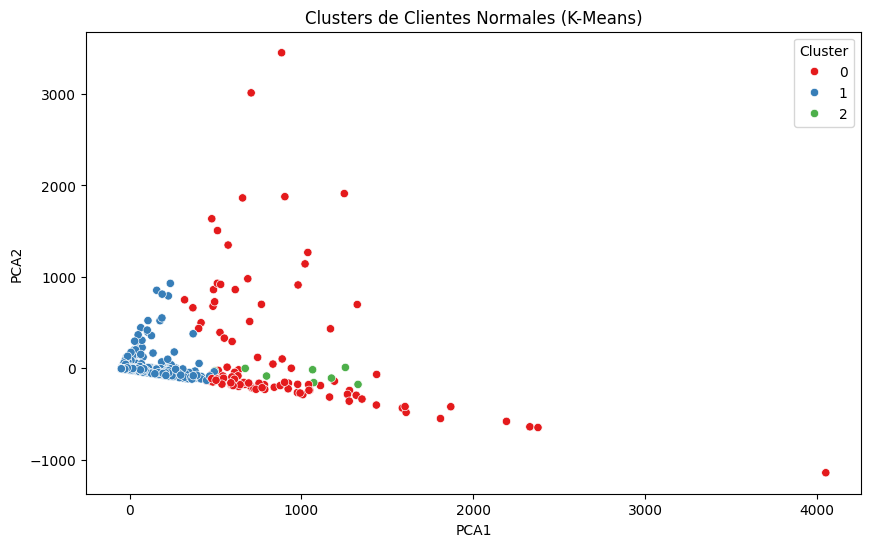

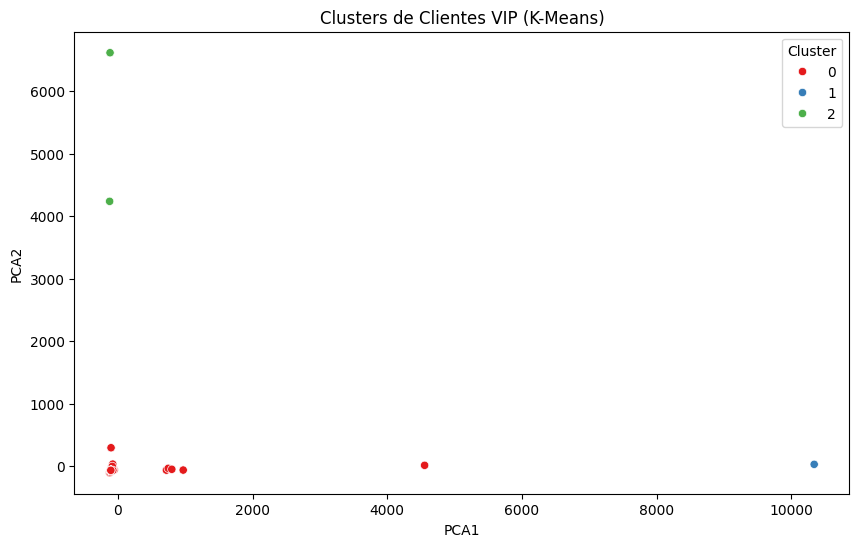

In [88]:
# Visualización de los clusters de K-Means
visualize_clusters(df_pivot_final_normales_kmeans, "Clusters de Clientes Normales (K-Means)")
visualize_clusters(df_pivot_final_vip_kmeans, "Clusters de Clientes VIP (K-Means)")

In [89]:
def apply_agglomerative_clustering(df_scaled, n_clusters=3):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    df_scaled['Cluster'] = cluster.fit_predict(df_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1))
    return df_scaled


In [90]:
# Aplicar Agglomerative Clustering a clientes normales y VIP
df_pivot_final_normales_agglo = apply_agglomerative_clustering(df_pivot_final_normales_scaled)
df_pivot_final_vip_agglo = apply_agglomerative_clustering(df_pivot_final_vip_scaled)

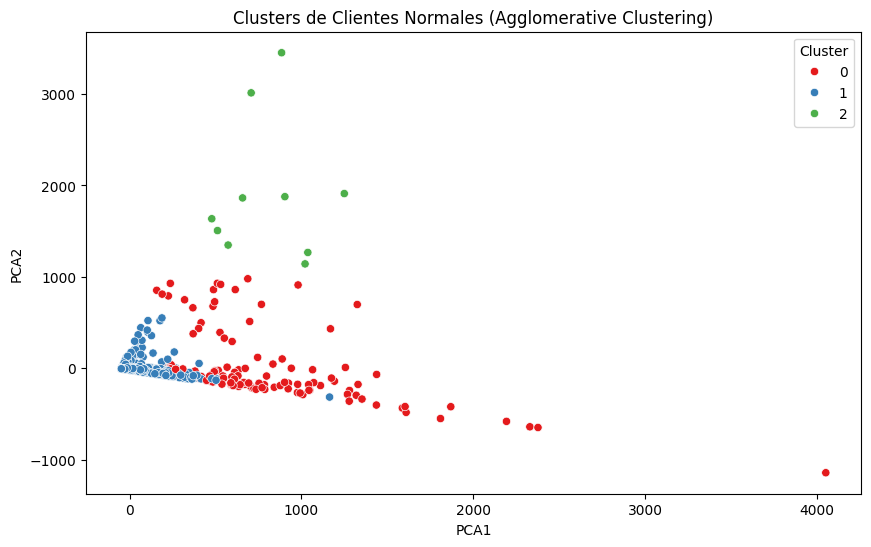

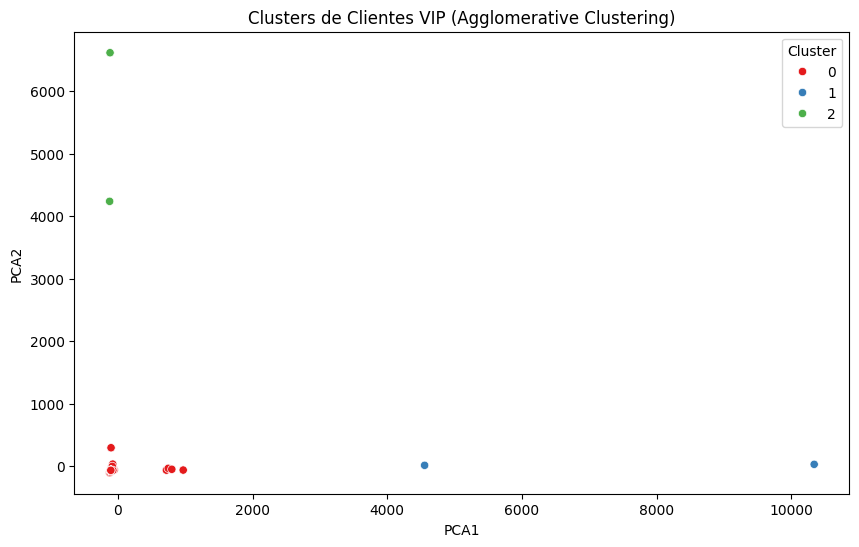

In [91]:
# Visualización de los clusters
visualize_clusters(df_pivot_final_normales_agglo, "Clusters de Clientes Normales (Agglomerative Clustering)")
visualize_clusters(df_pivot_final_vip_agglo, "Clusters de Clientes VIP (Agglomerative Clustering)")


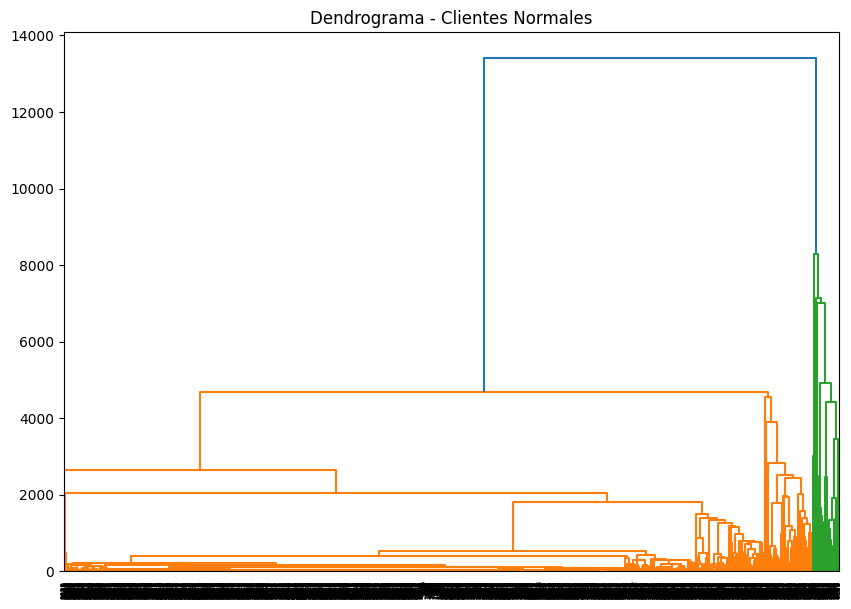

In [100]:
# Visualización de la dendrograma para clientes normales
plt.figure(figsize=(10, 7))
plt.title("Dendrograma - Clientes Normales")
dend = shc.dendrogram(shc.linkage(df_pivot_final_normales_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1), method='ward'))
plt.show()

In [515]:
silhouette_normales = silhouette_score(df_pivot_final_normales_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1), df_pivot_final_normales_agglo['Cluster'])
silhouette_vip = silhouette_score(df_pivot_final_vip_scaled.drop(['CLIENTE', 'tiene_credito', 'codigo_grupo'], axis=1), df_pivot_final_vip_agglo['Cluster'])


In [516]:

print(f'Silhouette Score - Clientes Normales: {silhouette_normales}')
print(f'Silhouette Score - Clientes VIP: {silhouette_vip}')

Silhouette Score - Clientes Normales: 0.8815527996343365
Silhouette Score - Clientes VIP: 0.9343315851679617


In [517]:
# Análisis de distribución de clientes por cluster
def analyze_clusters(df, cluster_col):
    cluster_counts = df[cluster_col].value_counts()
    print(f"Distribución de clientes por cluster:\n{cluster_counts}")

# Aplicar análisis a clientes normales y VIP
analyze_clusters(df_pivot_final_normales_agglo, 'Cluster')
analyze_clusters(df_pivot_final_vip_agglo, 'Cluster')

Distribución de clientes por cluster:
Cluster
1    3812
0     119
2      10
Name: count, dtype: int64
Distribución de clientes por cluster:
Cluster
0    176
2      2
1      2
Name: count, dtype: int64


In [518]:
# Resumen estadístico de las variables clave por cluster
def summarize_cluster_stats(df, cluster_col):
    return df.groupby(cluster_col).agg({
        'FRECUENCIA_ANUAL_MEDIA': ['mean', 'std', 'min', 'max'],
        'total_articulos': ['mean', 'std', 'min', 'max'],
        'antiguedad': ['mean', 'std', 'min', 'max']
    })

# Estadísticas clave por cluster para clientes normales y VIP
print("Estadísticas por cluster - Clientes Normales")
cluster_stats_normales = summarize_cluster_stats(df_pivot_final_normales_agglo, 'Cluster')
print(cluster_stats_normales)

print("\nEstadísticas por cluster - Clientes VIP")
cluster_stats_vip = summarize_cluster_stats(df_pivot_final_vip_agglo, 'Cluster')
print(cluster_stats_vip)

Estadísticas por cluster - Clientes Normales
        FRECUENCIA_ANUAL_MEDIA             total_articulos              \
                          mean std min max            mean std min max   
Cluster                                                                  
0                           11  10  -0  40              30  15   8  58   
1                            1   2  -0  72               1   4  -0  57   
2                            8   5   2  14              40  12  22  56   

        antiguedad              
              mean std min max  
Cluster                         
0                1   1  -1   3  
1                0   1  -1   3  
2                1   1  -0   3  

Estadísticas por cluster - Clientes VIP
        FRECUENCIA_ANUAL_MEDIA             total_articulos              \
                          mean std min max            mean std min max   
Cluster                                                                  
0                            0   1  -1   6       

In [97]:
# Analyze the cluster distribution for both normal and VIP clients
def analyze_clusters(df, cluster_col):
    cluster_counts = df[cluster_col].value_counts()
    return cluster_counts

# Get summary statistics for the most important variables per cluster
def summarize_cluster_stats(df, cluster_col):
    return df.groupby(cluster_col).agg({
        'FRECUENCIA_ANUAL_MEDIA': ['mean', 'std', 'min', 'max'],
        'total_articulos': ['mean', 'std', 'min', 'max'],
        'antiguedad': ['mean', 'std', 'min', 'max']
    })

In [98]:
# Analyze both normal and VIP clients
cluster_counts_normales = analyze_clusters(df_pivot_final_normales_agglo, 'Cluster')
cluster_stats_normales = summarize_cluster_stats(df_pivot_final_normales_agglo, 'Cluster')

cluster_counts_vip = analyze_clusters(df_pivot_final_vip_agglo, 'Cluster')
cluster_stats_vip = summarize_cluster_stats(df_pivot_final_vip_agglo, 'Cluster')

In [99]:
# Mostrar distribución de clientes por cluster
print("Distribución de clientes - Clientes Normales")
print(cluster_counts_normales)

print("\nDistribución de clientes - Clientes VIP")
print(cluster_counts_vip)

# Mostrar estadísticas clave por cluster
print("\nEstadísticas por cluster - Clientes Normales")
print(cluster_stats_normales)

print("\nEstadísticas por cluster - Clientes VIP")
print(cluster_stats_vip)


Distribución de clientes - Clientes Normales
Cluster
1    3812
0     119
2      10
Name: count, dtype: int64

Distribución de clientes - Clientes VIP
Cluster
0    176
2      2
1      2
Name: count, dtype: int64

Estadísticas por cluster - Clientes Normales
        FRECUENCIA_ANUAL_MEDIA             total_articulos              \
                          mean std min max            mean std min max   
Cluster                                                                  
0                           11  10  -0  40              30  15   8  58   
1                            1   2  -0  72               1   4  -0  57   
2                            8   5   2  14              40  12  22  56   

        antiguedad              
              mean std min max  
Cluster                         
0                1   1  -1   3  
1                0   1  -1   3  
2                1   1  -0   3  

Estadísticas por cluster - Clientes VIP
        FRECUENCIA_ANUAL_MEDIA             total_articulos 

In [67]:
df_pivot[columns_to_scale].describe()

,00,01,02,03,04,05,06,07,08,09,...,40007633.0,40007635.0,40007638.0,40007641.0,40007647.0,40007687.0,40007692.0,40007694.0,antiguedad,FRECUENCIA_ANUAL_MEDIA
count,4121,4121,4121,4121,4121,4121,4121,4121,4121,4121,...,4121,4121,4121,4121,4121,4121,4121,4121,4121,4121
mean,16,18,475,1,50,6,196,3,154,67,...,0,0,1,0,0,0,0,1,2327,15
std,95,96,6682,9,845,31,1405,14,1459,482,...,2,0,5,3,3,4,5,5,2122,54
min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,1
25%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,732,1
50%,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1488,2
75%,2,3,17,0,0,1,18,0,12,3,...,0,0,0,0,0,0,0,0,3133,7
max,3349,3514,400963,357,42588,751,48221,270,65719,18394,...,79,12,122,67,93,207,257,187,7234,1101


In [68]:
zero_proportion = (df_pivot[columns_to_scale] == 0).mean()
print(zero_proportion)

00                       1 
01                       1 
02                       1 
03                       1 
04                       1 
                         ..
40007687.0               1 
40007692.0               1 
40007694.0               1 
antiguedad               0 
FRECUENCIA_ANUAL_MEDIA   0 
Length: 167, dtype: float64


In [65]:
# Aplicar MinMaxScaler solo a las columnas seleccionadas
scaler = MinMaxScaler()
df_pivot[columns_to_scale] = scaler.fit_transform(df_pivot[columns_to_scale])

In [66]:
df_pivot.head()

,CLIENTE,00,01,02,03,04,05,06,07,08,...,40007638.0,40007641.0,40007647.0,40007687.0,40007692.0,40007694.0,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,1025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,1,0
2,1032,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,1035,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1043,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [42]:
df.shape

(693719, 11)

In [43]:
# 1. Seleccionar las características para el clustering
features = ['codigo_fabricante', 'antiguedad', 'FRECUENCIA_ANUAL_MEDIA']

# 2. Preparar los datos
X = df[features].copy()

# Verificar los tipos de datos
print("Tipos de datos de las características:")
print(X.dtypes)

# Aplicar get_dummies a las variables categóricas
categorical_features = ['codigo_fabricante']
X_encoded = pd.get_dummies(X, columns=categorical_features)


Tipos de datos de las características:
codigo_fabricante         float64
tiene_credito             float64
antiguedad                  int64
FRECUENCIA_ANUAL_MEDIA    float64
dtype: object


In [ ]:
# 3. Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 3.5. Estimar el tiempo de clustering con una muestra
sample_size = min(100000, len(X))
sample_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[sample_indices]

print("Estimating clustering time with a sample...")
clusterer_sample = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
sample_start_time = time.time()
clusterer_sample.fit(X_sample)
sample_time = time.time() - sample_start_time

estimated_full_time = sample_time * (X_scaled.shape[0] / sample_size)
print(f"Estimated time for full dataset: {estimated_full_time:.2f} seconds")

Estimating clustering time with a sample...


In [ ]:
# 4. Aplicar HDBSCAN al conjunto completo
print("Starting clustering on full dataset...")
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
start_time = time.time()
df['cluster'] = clusterer.fit_predict(X_scaled)
actual_time = time.time() - start_time

print(f"Actual clustering time: {actual_time:.2f} seconds")


In [ ]:
# Print final clustering results
n_clusters = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
n_noise = list(df['cluster']).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

In [ ]:
# 5. Save the results
print("Saving results...")
df.to_csv('customer_clustering_results.csv', index=False)
joblib.dump(clusterer, 'hdbscan_customer_model.joblib')
metadata = {
    'features_used': features,
    'n_clusters': n_clusters,
    'n_noise_points': n_noise,
    'clustering_time': actual_time,
    'min_cluster_size': clusterer.min_cluster_size,
    'min_samples': clusterer.min_samples
}
joblib.dump(metadata, 'customer_clustering_metadata.joblib')
print("Results saved successfully.")

In [ ]:
# 6. Print information about the encoded features
print("\nEncoded features:")
print(X_encoded.columns)
print(f"\nShape of encoded and scaled data: {X_scaled.shape}")

In [43]:
len(df['CLIENTE'].unique())

4121

In [44]:
df.head()

,CLIENTE,UNIDADES,ARTICULO,CODIGO_COMPRA,codigo_familia,codigo_fabricante,codigo_postal,codigo_grupo,tiene_credito,antiguedad,FRECUENCIA_ANUAL_MEDIA
0,1019,1,002810071,SM1-3128,0028,40007404,46700,1,1,7233,38
1,1019,1,0044152426461,SM1-11147,0044,40000662,46700,1,1,7233,38
2,1019,1,0044240705001,SM1-1785,0044,40000662,46700,1,1,7233,38
3,1019,1,0060PDSGPZ10070BL,SM1-6071,0064,40000772,46700,1,1,7233,38
4,1019,1,00R00601,SM1-8041,00R006,40000138,46700,1,1,7233,38


In [45]:
df_valores = df[['FRECUENCIA_ANUAL', 'VENTA_ANUAL']]


KeyboardInterrupt



In [24]:
correlacion = df_valores['FRECUENCIA_ANUAL'].corr(df_valores['VENTA_ANUAL'])
print(f"La correlación entre columna1 y columna2 es: {correlacion}")

La correlación entre columna1 y columna2 es: 0.8554342464802317


PENDIENTE GENERAR DATAFRAME CON VARIABLES DE PRODUCTOS A ESTILO 1HOT ENCODER.

--------------------------- PRUEBA Nº 2 ------------------------

In [25]:
customer_data = df.groupby('CLIENTE').agg({
    'VENTA_ANUAL': 'mean',
    'codigo_fabricante': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'codigo_grupo': 'first',
    'tiene_credito': 'first',
    'fecha_creacion': 'first',
}).reset_index()

customer_data['antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['fecha_creacion'])).dt.days

variables_cluster = ['VENTA_ANUAL', 'codigo_fabricante', 'codigo_grupo', 'tiene_credito', 'antiguedad']
X = customer_data[variables_cluster]

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_11920\1321465867.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_data['antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['fecha_creacion'])).dt.days


In [27]:
# Codificación de variables categóricas
encoding_dict = {}
for col in ['codigo_fabricante', 'codigo_grupo']:
    encoding_dict[col] = {val: i for i, val in enumerate(X[col].unique())}
    X[col] = X[col].map(encoding_dict[col])

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_11920\2940313547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(encoding_dict[col])


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
param_dist = {
    'min_cluster_size': np.arange(20, 100, step=10),
    'min_samples': np.arange(5, 30, step=5),
    'cluster_selection_epsilon': np.linspace(0.1, 1.0, num=10),
}

In [30]:
best_model = None
best_score = -np.inf

In [31]:
# Realizar búsqueda aleatoria
for params in tqdm(ParameterSampler(param_dist, n_iter=20), desc="Búsqueda de HDBSCAN"):
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=params['min_cluster_size'],
        min_samples=params['min_samples'],
        cluster_selection_epsilon=float(params['cluster_selection_epsilon']),
        metric='euclidean',
        cluster_selection_method='eom'
    )
    clusters = clusterer.fit_predict(X_scaled)

    # Calculamos la proporción de ruido
    noise_ratio = np.sum(clusters == -1) / len(clusters)
    
    # Consideramos un mejor modelo aquel que genere menos ruido
    score = -noise_ratio

    if score > best_score:
        best_score = score
        best_model = clusters

# Asignar los clusters finales
customer_data['cluster'] = best_model

Búsqueda de HDBSCAN: 100%|██████████| 20/20 [00:03<00:00,  6.16it/s]


In [32]:
print(customer_data['cluster'].value_counts().sort_index())

cluster
-1      11
 0     887
 1    3271
Name: count, dtype: int64


In [35]:
cluster_stats = customer_data.groupby('cluster').agg({
    'VENTA_ANUAL': ['mean', 'min', 'max'],
    'antiguedad': ['mean', 'min', 'max']
})
print("\nEstadísticas de los clusters:")
print(cluster_stats)


# PCA para visualización en 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
customer_data['pca1'] = pca_result[:, 0]
customer_data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_data, x='pca1', y='pca2', hue='cluster', palette='deep')
plt.title('Clusters de Clientes: Visualización PCA')
plt.savefig('cluster_pca.png')
plt.close()

# Guardar resultados
customer_data.to_csv('customer_clusters.csv', index=False)
df = df.merge(customer_data[['CLIENTE', 'cluster']], on='CLIENTE', how='left')
df.to_csv('df_with_customer_clusters.csv', index=False)

print("\nDiccionario de codificaciones:")
print(encoding_dict)


Estadísticas de los clusters:
           VENTA_ANUAL                           antiguedad           
                  mean      min            max         mean  min   max
cluster                                                               
-1       113594.474577  3464.88  350747.414079  4349.636364  149  6555
 0         5445.433154     8.06   66939.753110  3940.625705   58  7232
 1          551.374030     0.13   33987.397438  1859.907979   12  7232

Diccionario de codificaciones:
{'codigo_fabricante': {np.int64(0): 0, np.int64(1): 1, np.int64(2): 2, np.int64(3): 3, np.int64(4): 4, np.int64(5): 5, np.int64(6): 6, np.int64(7): 7, np.int64(8): 8, np.int64(9): 9, np.int64(10): 10, np.int64(11): 11, np.int64(12): 12, np.int64(13): 13, np.int64(14): 14, np.int64(15): 15, np.int64(16): 16, np.int64(17): 17, np.int64(18): 18, np.int64(19): 19, np.int64(20): 20, np.int64(21): 21, np.int64(22): 22, np.int64(23): 23, np.int64(24): 24, np.int64(25): 25, np.int64(26): 26, np.int64(27): 27, np.i

---------------------------- PRUEBA Nº 1 -----------------------------

In [28]:
customer_data = df.groupby('CLIENTE').agg({
    'VENTA_ANUAL': 'mean',  # Promedio de venta anual
    'FRECUENCIA_ANUAL': 'mean',  # Promedio de frecuencia anual
    'codigo_fabricante': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,  # Fabricante más frecuente
    'codigo_grupo': 'first',  # Asumimos que el código de grupo es constante para cada cliente
    'tiene_credito': 'first',  # Asumimos que el estado de crédito es constante para cada cliente
    'fecha_creacion': 'first',  # Fecha de creación del cliente
}).reset_index()

In [29]:
customer_data['antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['fecha_creacion'])).dt.days

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_27968\1055060855.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_data['antiguedad'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['fecha_creacion'])).dt.days


In [30]:
variables_cluster = ['VENTA_ANUAL', 'FRECUENCIA_ANUAL', 'codigo_fabricante', 'codigo_grupo', 'tiene_credito', 'antiguedad']
X = customer_data[variables_cluster]

In [31]:
encoding_dict = {}
for col in ['codigo_fabricante', 'codigo_grupo']:
    encoding_dict[col] = {val: i for i, val in enumerate(X[col].unique())}
    X[col] = X[col].map(encoding_dict[col])

X_encoded = pd.get_dummies(X, columns=['codigo_fabricante', 'codigo_grupo'])

C:\Users\Prueba1\AppData\Local\Temp\ipykernel_27968\3206291975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(encoding_dict[col])


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [33]:
# Configurar y ejecutar HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=150,  # Ajustado para tener en cuenta que ahora trabajamos con clientes únicos
    min_samples=5,
    cluster_selection_epsilon=0.1,
    metric='euclidean',
    cluster_selection_method='eom'
)

In [34]:
# Usar tqdm para mostrar el progreso
with tqdm(total=100, desc="Aplicando HDBSCAN") as pbar:
    clusters = clusterer.fit_predict(X_scaled)
    pbar.update(100)

customer_data['cluster'] = clusters

print(customer_data['cluster'].value_counts().sort_index())


Aplicando HDBSCAN: 100%|██████████| 100/100 [00:03<00:00, 26.80it/s]

cluster
-1    3183
 0     193
 1     192
 2     174
 3     233
 4     194
Name: count, dtype: int64


In [35]:
cluster_stats = customer_data.groupby('cluster').agg({
    'VENTA_ANUAL': ['mean', 'min', 'max'],
    'FRECUENCIA_ANUAL': ['mean', 'min', 'max'],
    'antiguedad': ['mean', 'min', 'max']
})

print("\nEstadísticas de los clusters:")
print(cluster_stats)


Estadísticas de los clusters:
         VENTA_ANUAL                        FRECUENCIA_ANUAL       \
                mean     min            max             mean  min   
cluster                                                             
-1       1420.432585   0.130  350747.414079        10.247996  1.0   
 0       1277.737417   0.690   22282.159442        15.418924  1.0   
 1       3844.848739   4.900   38483.055028        24.413686  1.0   
 2        979.018860   9.400    8322.540000         2.295836  1.0   
 3       8330.959538  11.642   49634.916269        82.215636  1.0   
 4       1369.426945   2.580   14648.122755        19.191810  1.0   

                       antiguedad            
                 max         mean min   max  
cluster                                      
-1       1101.150473  1983.659127  12  7232  
 0        290.008786  3329.652850  14  7232  
 1        266.990316  4368.119792  78  7232  
 2         12.000000  1069.339080  28  7232  
 3        473.480000  467

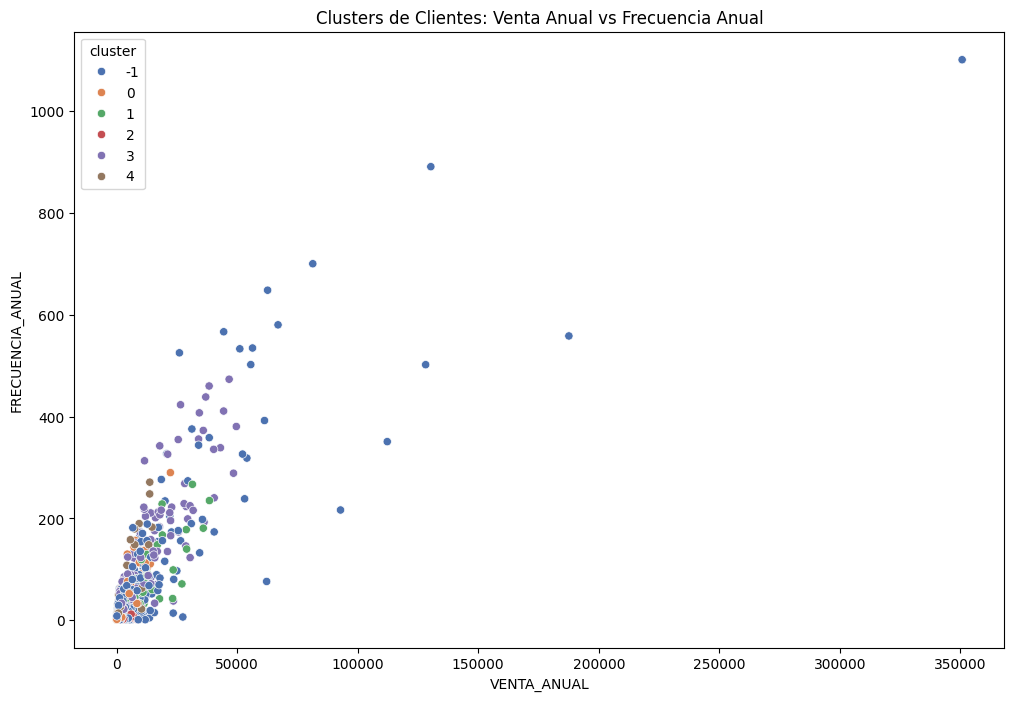

In [41]:
# Visualizaciones
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_data, x='VENTA_ANUAL', y='FRECUENCIA_ANUAL', hue='cluster', palette='deep')
plt.title('Clusters de Clientes: Venta Anual vs Frecuencia Anual')
plt.savefig('cluster_scatter.png')
plt.show()

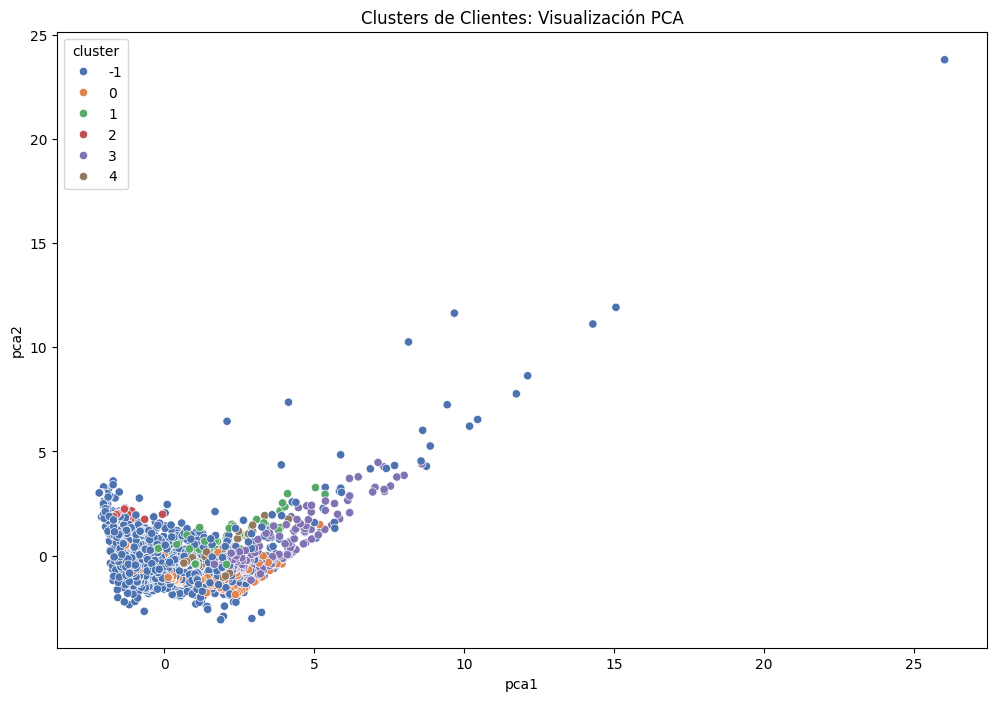

In [42]:
# PCA para visualización en 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
customer_data['pca1'] = pca_result[:, 0]
customer_data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_data, x='pca1', y='pca2', hue='cluster', palette='deep')
plt.title('Clusters de Clientes: Visualización PCA')
plt.show()

In [40]:
print("\nDiccionario de codificaciones:")
print(encoding_dict)


Diccionario de codificaciones:
{'codigo_fabricante': {np.float64(40007533.0): 0, np.float64(40000086.0): 1, np.float64(40000184.0): 2, np.float64(40000138.0): 3, np.float64(40000536.0): 4, np.float64(40007167.0): 5, np.float64(40000055.0): 6, np.float64(40000123.0): 7, np.float64(40000154.0): 8, np.float64(40007451.0): 9, np.float64(40000085.0): 10, np.float64(40000702.0): 11, np.float64(40007214.0): 12, np.float64(40000406.0): 13, np.float64(40000346.0): 14, np.float64(40000650.0): 15, np.float64(40001145.0): 16, np.float64(40000704.0): 17, np.float64(40007087.0): 18, np.float64(40000047.0): 19, np.float64(40001132.0): 20, np.float64(40000136.0): 21, np.float64(40007146.0): 22, np.float64(40000321.0): 23, np.float64(40007271.0): 24, np.float64(40000649.0): 25, np.float64(40007045.0): 26, np.float64(40007152.0): 27, np.float64(40007400.0): 28, np.float64(40007692.0): 29, np.float64(40000988.0): 30, np.float64(40000438.0): 31, np.float64(40007478.0): 32, np.float64(40007602.0): 33, np.